Course: https://www.udemy.com/course/time-series-analysis/

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs

# Warmup
## Exercise 1
- Using numpy, generate 1000 samples from the standard normal
- Plot the results as time series
- Plot the results as histogram

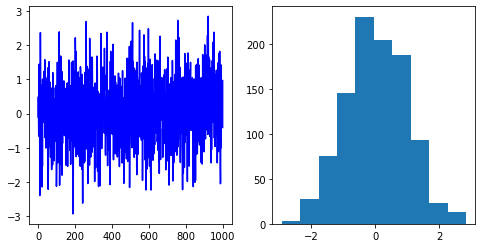

In [9]:
rs = np.random.normal(size=1000) # standard normal is default

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(rs,c='b')
plt.subplot(122)
plt.hist(rs)
plt.show()

## Exercise 2
- Add a trend line to the noise
    - This is a little ambiguous given the example image he shows on the video...
    - For now plotting a line of equal length to the noise sample and adding the noise to the y-axis, then fitting a line 
- Make a scatterplot
- Bonus: find and plot the best-fit line

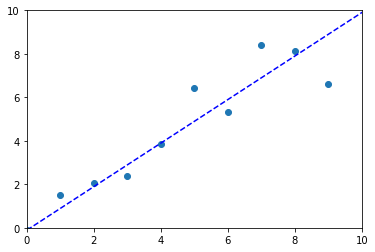

In [19]:
z = np.polyfit(np.arange(len(rs)),np.arange(len(rs))+rs,1)
p = np.poly1d(z)

plt.figure()
plt.scatter(np.arange(len(rs)),np.arange(len(rs))+rs)
plt.plot(np.arange(len(rs)),p(np.arange(len(rs))),'--b')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

## Exercise 3
- Call the np.cumsum() function on your noise
- Plot the result
- What does it remind you of?
    - So many things...

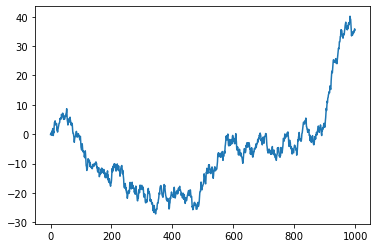

In [20]:
rs_cs = np.cumsum(rs)

plt.figure()
plt.plot(rs_cs)
plt.show()

## Exercise 4
- Generate and plot 1000 samples from the multivariate normal
    - Using mean and covariance matrices as specified in video
- Use scipy or any other library you prefer

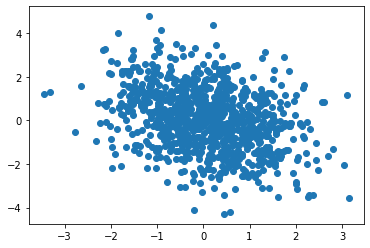

In [27]:
rv = scs.multivariate_normal(mean=np.array([0,0]),cov=np.array([[1,-0.5],[-0.5,2]]))
mn_sample = rv.rvs(size=1000)

plt.figure()
plt.scatter(mn_sample[:,0],mn_sample[:,1])
plt.show()

## Exercise 5
- Calculate the sample mean and sample covariance of the data you just generated - are they close to what you expect?
    - Bonus: don't use np.mean() and np.cov()

In [36]:
def mean(x):
    n = x.flatten().shape[0]
    return np.sum(x.flatten())/n

def cov(x,y):
    return mean(x*y)-mean(x)*mean(y)

In [38]:
print('Mean: {}'.format(mean(mn_sample)))
print('Cov: {}'.format(cov(mn_sample[:,0],mn_sample[:,1])))

Mean: 0.060182295490345025
Cov: -0.4695664075474562


- Yes, close to what we expect, i.e mean = 0 and cov = -0.5
- Note that the covariance will be bounded between $-\sigma_X\sigma_Y$ and $+\sigma_X\sigma_Y$. Here we expect $\text{cov}(XY)=-0.5\sigma_X\sigma_Y$ and, since each standard deviation is equal to 1, the covariance should be (close to) -0.5